In [33]:
import pandas as pd
import numpy as np

In [34]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42 

In [35]:
bio_sites = pd.read_csv('/carnegie/nobackup/scratch/tbellagio/grene/data/bioclimvars_experimental_sites_era5.csv')

In [36]:
bio_sites = bio_sites[['site', 'bio1']]

In [37]:
founder_ecotype_names = pd.read_csv('/carnegie/nobackup/scratch/tbellagio/gea_grene-net/key_files/founder_ecotype_names.csv')['0'].values

In [38]:
bio_ecotypes = pd.read_csv('/carnegie/nobackup/scratch/tbellagio/grene/data/bioclimvars_ecotypes_era5.csv')

In [39]:
bio_ecotypes = bio_ecotypes[bio_ecotypes['ecotype'].isin(founder_ecotype_names)]

In [40]:
bio_ecotypes = bio_ecotypes[['ecotype', 'bio1']]

In [41]:
mean_bio_ecotypes = bio_ecotypes['bio1'].mean()

In [42]:
std_bio_ecotypes = bio_ecotypes['bio1'].std()

In [43]:
std_bio_ecotypes

4.919156885062716

In [44]:
mean_bio_ecotypes

10.134792057871392

In [45]:
bio_sites['biovar'] = (bio_sites['bio1'] - mean_bio_ecotypes) / std_bio_ecotypes

In [46]:
pred_ss = pd.read_csv('/carnegie/nobackup/scratch/tbellagio/gea_grene-net/key_files/Genomic_offset_stabilizing_selection_loo_era5_prediction_summary.txt',sep = '\t')

pred_ss = pred_ss[pred_ss['source'] == 'stabilizing_era5']

pred_ss = pred_ss[['site', 'plot','r2']]



#pred_ss = pred_ss.groupby('site')['r2'].mean()

pred_ss = pred_ss.reset_index()

pred_site_present = pred_ss['site'].unique()

In [47]:
pred_ss = pred_ss.merge(bio_sites[['site', 'bio1']])
pred_ss['bio1'] = pred_ss['bio1'].round(1)

In [48]:
survival = pd.read_csv('/carnegie/nobackup/scratch/tbellagio/gea_grene-net/key_files/survival.csv')

survival = survival.replace(-1, np.nan)

#survival.loc[survival['plot'].isin(['no_germination', 'no_flowering']), '1_survival'] = 0 
#survival.loc[survival['plot'].isin(['no_germination', 'no_flowering']), '2_survival'] = 0 
#survival.loc[survival['plot'].isin(['no_germination', 'no_flowering']), '3_survival'] = 0 
#survival.loc[survival['plot'].isin(['no_germination', 'no_flowering']), '4_survival'] = 0 
#survival.loc[survival['plot'].isin(['no_germination', 'no_flowering']), '5_survival'] = 0 



#survival_sum = survival.groupby('site')[['1_survival', '2_survival', '3_survival', '4_survival', '5_survival']].mean().reset_index()

survival = survival[['site', 'plot','1_survival', '2_survival', '3_survival', '4_survival', '5_survival']]

In [49]:




survival = survival[survival['plot'] != 'no_grenenet']

# List of columns to check for NaN
#columns_to_check = ['1_survival', '2_survival', '3_survival', '4_survival', '5_survival']

# Select rows where all the specified columns have NaN
#rows_with_all_nans = survival_sum.loc[survival_sum[columns_to_check].isna().all(axis=1)]

#survival_sum = survival_sum[~survival_sum['site'].isin(rows_with_all_nans['site'].unique())]

survival_site_present = survival['site'].unique()

survival_sum = survival[survival['site'].isin(pred_site_present)]

survival_sum['plot'] = survival_sum['plot'].astype(int)

/tmp/ipykernel_46815/924323427.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survival_sum['plot'] = survival_sum['plot'].astype(int)


In [50]:
survival_sum

,site,plot,1_survival,2_survival,3_survival,4_survival,5_survival
0,1.0,1,1.0,1.0,1.0,NaN,NaN
1,1.0,2,1.0,1.0,0.0,NaN,NaN
2,1.0,3,1.0,1.0,0.0,NaN,NaN
3,1.0,4,1.0,1.0,1.0,NaN,NaN
4,1.0,5,1.0,1.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...
435,60.0,8,1.0,0.0,0.0,0.0,0.0
436,60.0,9,1.0,0.0,0.0,0.0,0.0
437,60.0,10,1.0,0.0,0.0,0.0,0.0
438,60.0,11,1.0,0.0,0.0,0.0,0.0


In [51]:
df = survival_sum.merge(pred_ss, on=['site', 'plot'])
df.columns = ['site', 'plot', 'X1_survival', 'X2_survival', 'X3_survival', 'X4_survival', 'X5_survival', 'index', 'r2', 'bio1']


In [52]:
df

,site,plot,X1_survival,X2_survival,X3_survival,X4_survival,X5_survival,index,r2,bio1
0,1.0,1,1.0,1.0,1.0,NaN,NaN,0,0.111028,10.7
1,1.0,2,1.0,1.0,0.0,NaN,NaN,1,0.375219,10.7
2,1.0,3,1.0,1.0,0.0,NaN,NaN,2,0.208059,10.7
3,1.0,4,1.0,1.0,1.0,NaN,NaN,3,0.202136,10.7
4,1.0,5,1.0,1.0,1.0,NaN,NaN,4,0.322440,10.7
...,...,...,...,...,...,...,...,...,...,...
320,60.0,8,1.0,0.0,0.0,0.0,0.0,320,0.313713,19.2
321,60.0,9,1.0,0.0,0.0,0.0,0.0,321,0.068112,19.2
322,60.0,10,1.0,0.0,0.0,0.0,0.0,322,0.098443,19.2
323,60.0,11,1.0,0.0,0.0,0.0,0.0,323,0.295903,19.2


/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/carnegie/hpcdata/software/conda/envs/python-3.11/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: P

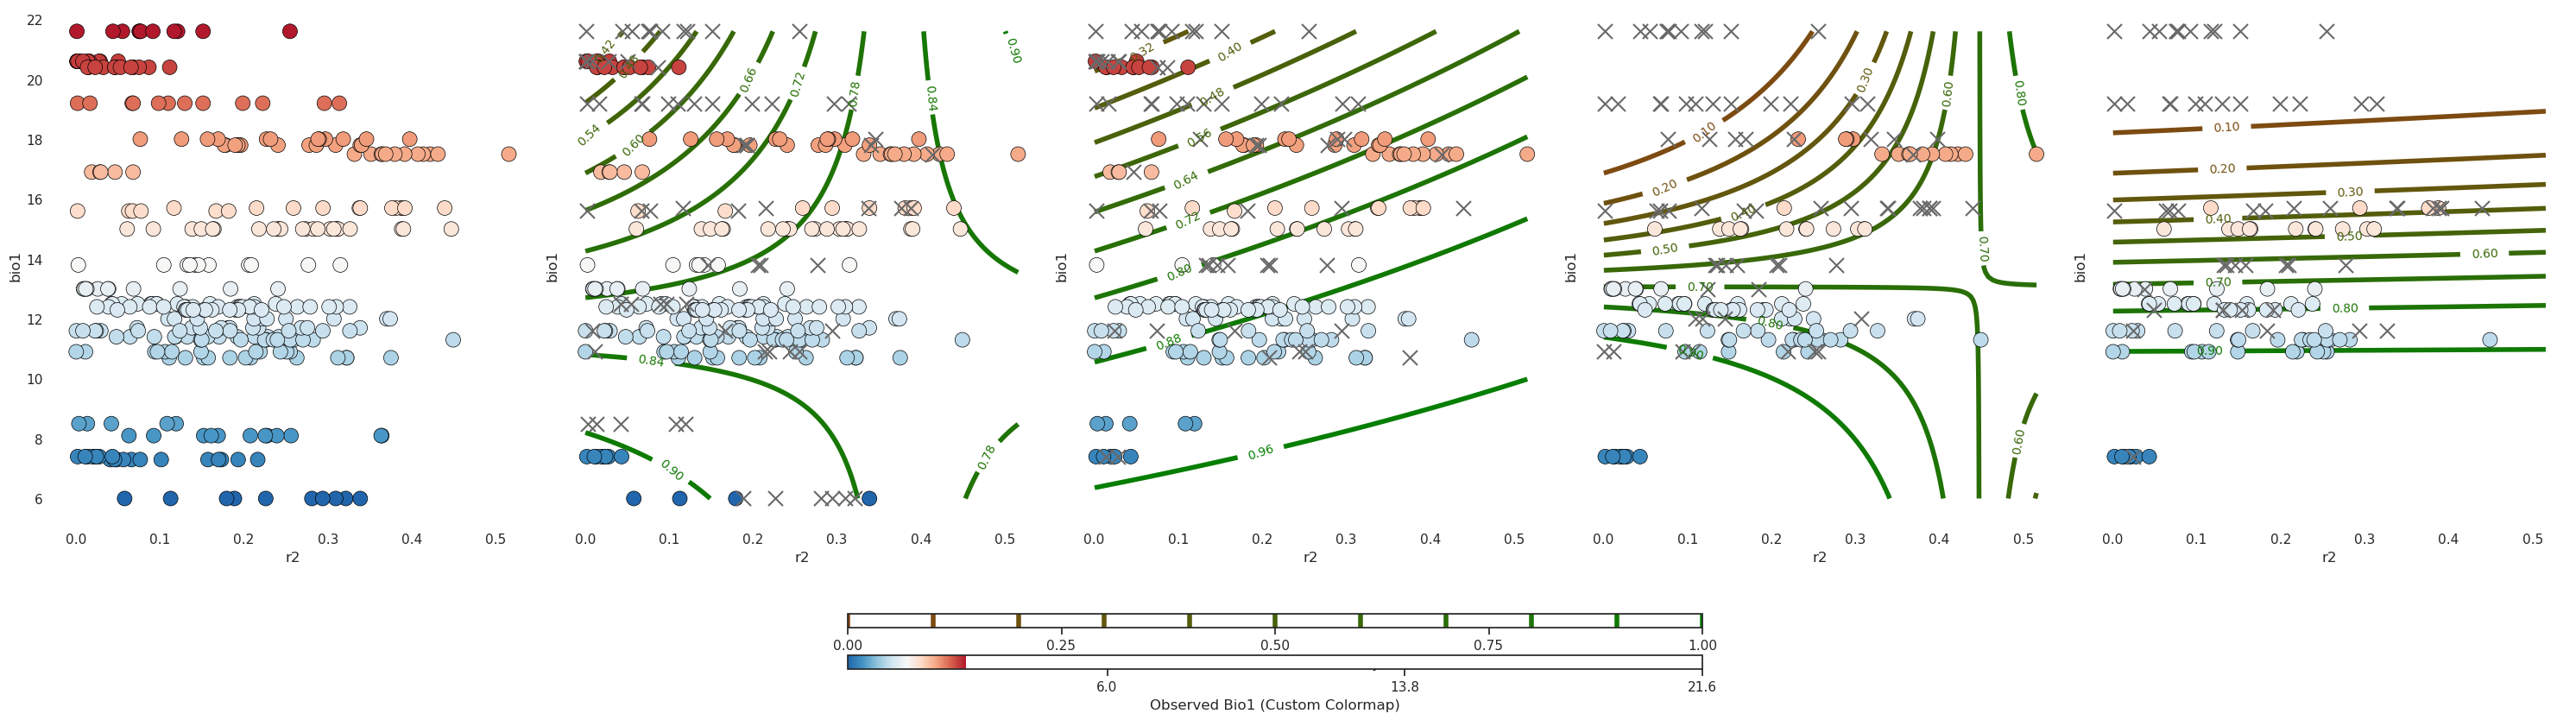

In [196]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from matplotlib.colors import LinearSegmentedColormap

# Custom colormap for contour lines (brown to green)
brown_green_cmap = LinearSegmentedColormap.from_list("BrownGreen", ["saddlebrown", "green"])
biovar = 'bio1'
# Custom colormap for Bio1 based on your specified colors
# Custom colormap for Bio1 based on your specified colors
# Custom colormap for Bio1 (reversed: high values red, low values blue)
bio1_colors = ["#2166AC", "#4393C3", "#92C5DE", "#D1E5F0", "#F7F7F7", 
               "#FDDBC7", "#F4A582", "#D6604D", "#B2182B"]
bio1_cmap = LinearSegmentedColormap.from_list("Bio1Cmap", bio1_colors)

# List of survival columns to loop through
survival_columns = ['X1_survival', 'X2_survival', 'X3_survival', 'X4_survival', 'X5_survival']

# Create a 1x5 subplot grid
fig, axes = plt.subplots(1, 5, figsize=(30, 8), sharex=True, sharey=True)
sns.set(style="white")

# Margin factor for x and y limits
margin_factor = 0.05

# Set the shared survival range (0 to 1)
vmin, vmax = 0, 1

# Shared colormap range for scatter plots
scatter_vmin, scatter_vmax = df[biovar].min(), df[biovar].max()

# Iterate over each survival column and plot
for idx, survival_col in enumerate(survival_columns):
    # Fit the logistic regression model (GLM with binomial family)
    model = smf.glm(f'{survival_col} ~ r2 * bio1', data=df, family=sm.families.Binomial()).fit()

    # Create a grid of r2 and std_bioecotypes values
    r2_vals = np.linspace(df['r2'].min(), df['r2'].max(), 100)
    go_vals = np.linspace(df[biovar].min(), df[biovar].max(), 100)
    r2_grid, go_grid = np.meshgrid(r2_vals, go_vals)

    # Create a DataFrame for predictions
    grid_df = pd.DataFrame({
        'r2': r2_grid.ravel(),
        'bio1': go_grid.ravel()
    })

    # Predict survival probabilities on the grid
    grid_df['predicted_survival'] = model.predict(grid_df)

    # Reshape predictions to match the grid shape
    predicted_survival = grid_df['predicted_survival'].values.reshape(r2_grid.shape)

    # Subplot position
    ax = axes[idx]
    #ax.set_title(f"Predicted Survival - Year {idx + 1}")

    # Plot contour lines with thicker lines and custom colormap
    contour = ax.contour(r2_grid, go_grid, predicted_survival, cmap=brown_green_cmap, 
                         levels=10, vmin=vmin, vmax=vmax, linewidths=4)
    ax.clabel(contour, inline=True, fontsize=10, fmt="%.2f")
    ax.set_xlabel("r2")
    ax.set_ylabel(biovar)

    # Set plot limits with some margin
    x_margin = (df['r2'].max() - df['r2'].min()) * margin_factor
    y_margin = (df[biovar].max() - df[biovar].min()) * margin_factor
    ax.set_xlim(df['r2'].min() - x_margin, df['r2'].max() + x_margin)
    ax.set_ylim(df[biovar].min() - y_margin, df[biovar].max() + y_margin)

    this_year = df[['r2', biovar, survival_col]]

    # Separate alive (1) and dead (0) points
    alive_points = this_year[this_year[survival_col] == 1]
    dead_points = this_year[this_year[survival_col] == 0]

    # Plot alive points as circles with black edges and reversed Bio1 colormap
    scatter_alive = ax.scatter(alive_points['r2'], alive_points[biovar], 
                               c=alive_points[biovar], cmap=bio1_cmap, 
                               s=150, edgecolor='black', linewidth=0.5, 
                               vmin=scatter_vmin, vmax=scatter_vmax, zorder=3)

    # Plot dead points as crosses with a better shade of gray
    scatter_dead = ax.scatter(dead_points['r2'], dead_points[biovar], 
                              s=150, color='dimgray', linewidth=1.5, marker='x', 
                              zorder=3)

    
    # Remove the top, bottom, left, and right spines (frame)
    for spine in ["top", "right", "left", "bottom"]:
        ax.spines[spine].set_visible(False)
        
    for yline in [0, 1, 2]:
        ax.axhline(y=yline, linestyle='--', color='grey', linewidth=1.3)

# Add a single shared horizontal colorbar for predicted survival (contour lines)
cbar_pred_ax = fig.add_axes([0.33, 0.08, 0.33, 0.02])  # [left, bottom, width, height]
cbar_pred = fig.colorbar(contour, cax=cbar_pred_ax, orientation='horizontal', label="Predicted Survival Probability")
cbar_pred.set_ticks([0, 0.25, 0.5, 0.75, 1])

# Add a single shared horizontal colorbar for observed survival (scatter plot)
cbar_obs_ax = fig.add_axes([0.33, 0.02, 0.33, 0.02])  # Adjusted position and width for the second colorbar
cbar_obs = fig.colorbar(scatter, cax=cbar_obs_ax, orientation='horizontal', label="Observed Bio1 (Custom Colormap)")
cbar_obs.set_ticks([scatter_vmin, (scatter_vmin + scatter_vmax) / 2, scatter_vmax])

# Adjust layout and save
plt.tight_layout(rect=[0, 0.15, 1, 1])  # Adjust to make space for the colorbars
plt.savefig('survival_pred_sites_ss_bio1.pdf')
plt.show()


In [53]:
psuedo_h2 = pd.read_csv('/carnegie/nobackup/scratch/tbellagio/gea_grene-net/key_files/generation_1_heritability_ecotypefreq.txt', sep = ' ')

In [54]:
psuedo_h2 = psuedo_h2.merge(bio_sites[['site', 'bio1']]) # std_bioecotypes
psuedo_h2['std_bioecotypes'] = psuedo_h2['bio1'].round(1)

In [55]:
survival_sum

,site,plot,1_survival,2_survival,3_survival,4_survival,5_survival
0,1.0,1,1.0,1.0,1.0,NaN,NaN
1,1.0,2,1.0,1.0,0.0,NaN,NaN
2,1.0,3,1.0,1.0,0.0,NaN,NaN
3,1.0,4,1.0,1.0,1.0,NaN,NaN
4,1.0,5,1.0,1.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...
435,60.0,8,1.0,0.0,0.0,0.0,0.0
436,60.0,9,1.0,0.0,0.0,0.0,0.0
437,60.0,10,1.0,0.0,0.0,0.0,0.0
438,60.0,11,1.0,0.0,0.0,0.0,0.0


In [56]:
df = survival_sum.merge(psuedo_h2, on=['site'])

In [57]:
df

,site,plot,1_survival,2_survival,3_survival,4_survival,5_survival,pseudoVa,bio1,std_bioecotypes
0,1.0,1,1.0,1.0,1.0,NaN,NaN,0.405298,10.743906,10.7
1,1.0,2,1.0,1.0,0.0,NaN,NaN,0.405298,10.743906,10.7
2,1.0,3,1.0,1.0,0.0,NaN,NaN,0.405298,10.743906,10.7
3,1.0,4,1.0,1.0,1.0,NaN,NaN,0.405298,10.743906,10.7
4,1.0,5,1.0,1.0,1.0,NaN,NaN,0.405298,10.743906,10.7
...,...,...,...,...,...,...,...,...,...,...
366,60.0,8,1.0,0.0,0.0,0.0,0.0,0.189004,19.248051,19.2
367,60.0,9,1.0,0.0,0.0,0.0,0.0,0.189004,19.248051,19.2
368,60.0,10,1.0,0.0,0.0,0.0,0.0,0.189004,19.248051,19.2
369,60.0,11,1.0,0.0,0.0,0.0,0.0,0.189004,19.248051,19.2


In [58]:

df.columns = ['site', 'plot', 'X1_survival', 'X2_survival', 'X3_survival', 'X4_survival', 'X5_survival', 'pseudoVa', 'bio1','std_bioecotypes']


In [61]:
df

,site,plot,X1_survival,X2_survival,X3_survival,X4_survival,X5_survival,pseudoVa,bio1,std_bioecotypes
0,1.0,1,1.0,1.0,1.0,NaN,NaN,0.405298,10.743906,10.7
1,1.0,2,1.0,1.0,0.0,NaN,NaN,0.405298,10.743906,10.7
2,1.0,3,1.0,1.0,0.0,NaN,NaN,0.405298,10.743906,10.7
3,1.0,4,1.0,1.0,1.0,NaN,NaN,0.405298,10.743906,10.7
4,1.0,5,1.0,1.0,1.0,NaN,NaN,0.405298,10.743906,10.7
...,...,...,...,...,...,...,...,...,...,...
366,60.0,8,1.0,0.0,0.0,0.0,0.0,0.189004,19.248051,19.2
367,60.0,9,1.0,0.0,0.0,0.0,0.0,0.189004,19.248051,19.2
368,60.0,10,1.0,0.0,0.0,0.0,0.0,0.189004,19.248051,19.2
369,60.0,11,1.0,0.0,0.0,0.0,0.0,0.189004,19.248051,19.2


/tmp/ipykernel_46815/2318146768.py:117: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.15, 1, 1])  # Adjust to make space for the colorbars


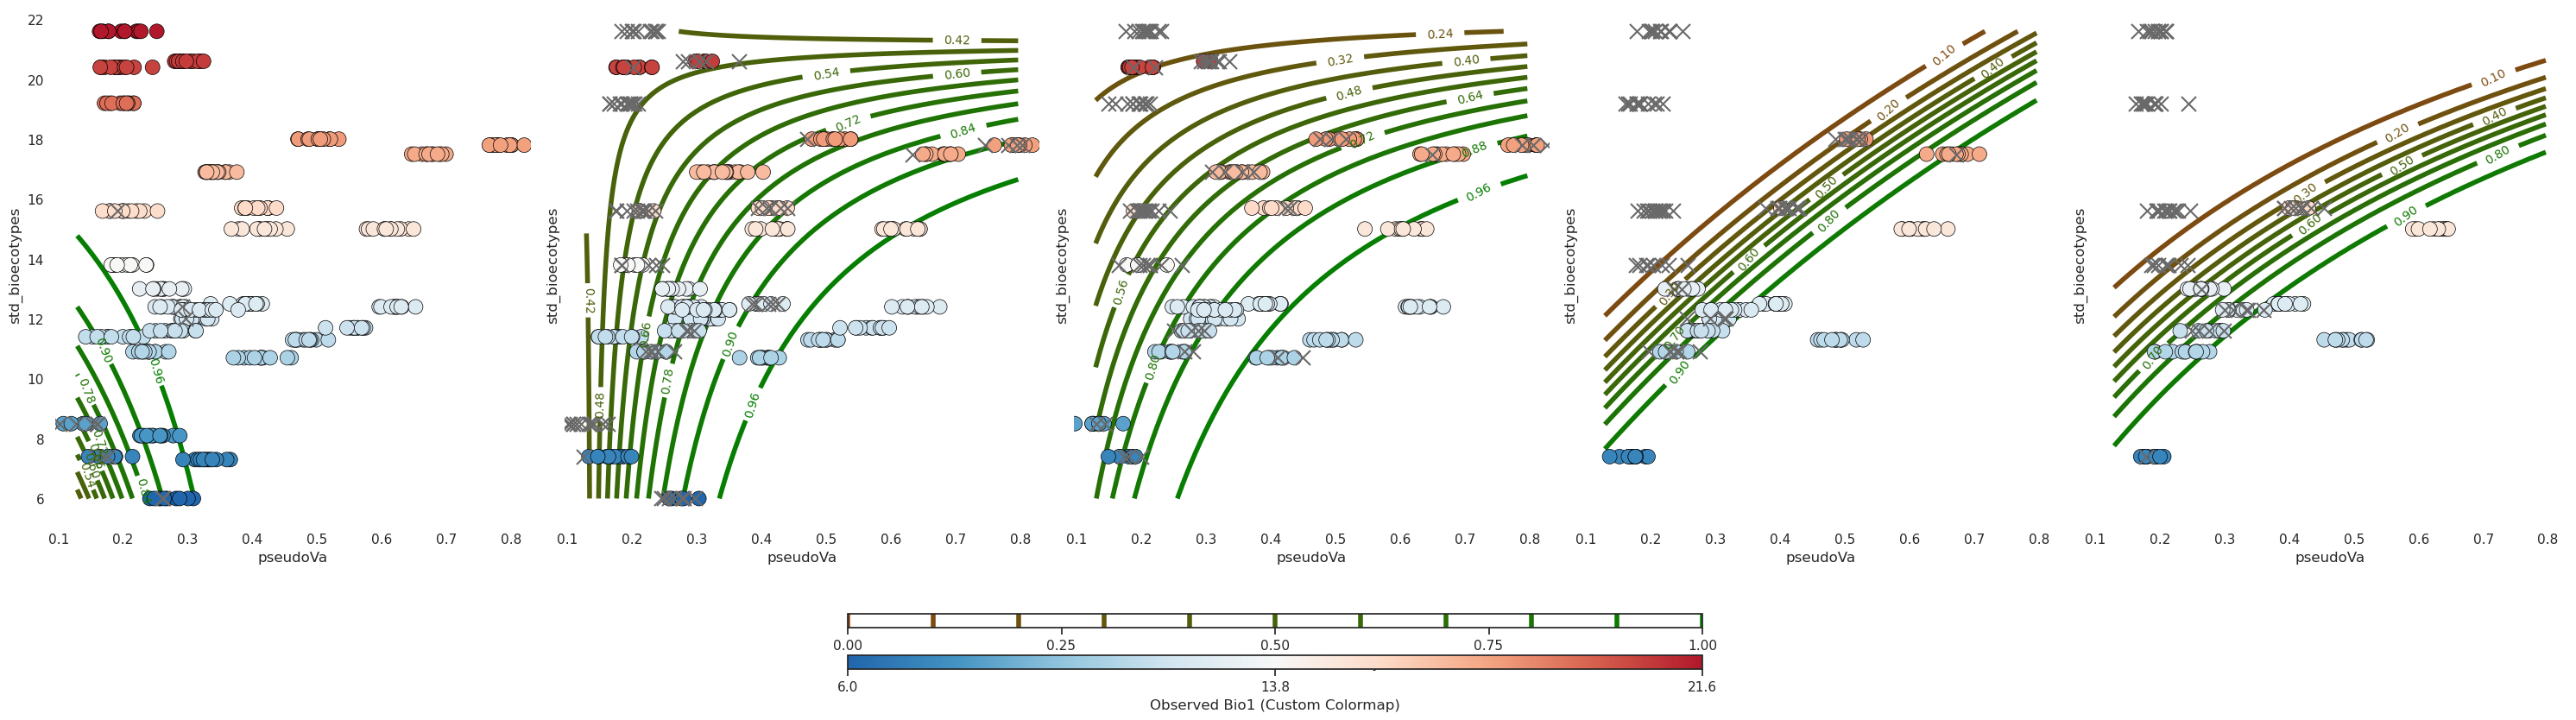

In [71]:
jitter_strength = 0.02  # Adjust this value as needed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from matplotlib.colors import LinearSegmentedColormap

# Custom colormap for contour lines (brown to green)
brown_green_cmap = LinearSegmentedColormap.from_list("BrownGreen", ["saddlebrown", "green"])

# Custom colormap for Bio1 based on your specified colors
# Custom colormap for Bio1 based on your specified colors
# Custom colormap for Bio1 (reversed: high values red, low values blue)
bio1_colors = ["#2166AC", "#4393C3", "#92C5DE", "#D1E5F0", "#F7F7F7", 
               "#FDDBC7", "#F4A582", "#D6604D", "#B2182B"]
bio1_cmap = LinearSegmentedColormap.from_list("Bio1Cmap", bio1_colors)

# List of survival columns to loop through
survival_columns = ['X1_survival', 'X2_survival', 'X3_survival', 'X4_survival', 'X5_survival']

# Create a 1x5 subplot grid
fig, axes = plt.subplots(1, 5, figsize=(30, 8), sharex=True, sharey=True)
sns.set(style="white")

# Margin factor for x and y limits
margin_factor = 0.05

# Set the shared survival range (0 to 1)
vmin, vmax = 0, 1

# Shared colormap range for scatter plots
scatter_vmin, scatter_vmax = df['std_bioecotypes'].min(), df['std_bioecotypes'].max()

# Iterate over each survival column and plot
for idx, survival_col in enumerate(survival_columns):
    # Fit the logistic regression model (GLM with binomial family)
    model = smf.glm(f'{survival_col} ~ pseudoVa * std_bioecotypes', data=df, family=sm.families.Binomial()).fit()

    # Create a grid of pseudoVa and std_bioecotypes values
    pseudoVa_vals = np.linspace(df['pseudoVa'].min(), df['pseudoVa'].max(), 100)
    go_vals = np.linspace(df['std_bioecotypes'].min(), df['std_bioecotypes'].max(), 100)
    pseudoVa_grid, go_grid = np.meshgrid(pseudoVa_vals, go_vals)

    # Create a DataFrame for predictions
    grid_df = pd.DataFrame({
        'pseudoVa': pseudoVa_grid.ravel(),
        'std_bioecotypes': go_grid.ravel()
    })

    # Predict survival probabilities on the grid
    grid_df['predicted_survival'] = model.predict(grid_df)

    # Reshape predictions to match the grid shape
    predicted_survival = grid_df['predicted_survival'].values.reshape(pseudoVa_grid.shape)

    # Subplot position
    ax = axes[idx]
    #ax.set_title(f"Predicted Survival - Year {idx + 1}")

    # Plot contour lines with thicker lines and custom colormap
    contour = ax.contour(pseudoVa_grid, go_grid, predicted_survival, cmap=brown_green_cmap, 
                         levels=10, vmin=vmin, vmax=vmax, linewidths=4)
    ax.clabel(contour, inline=True, fontsize=10, fmt="%.2f")
    ax.set_xlabel("pseudoVa")
    ax.set_ylabel("std_bioecotypes")

    # Set plot limits with some margin
    x_margin = (df['pseudoVa'].max() - df['pseudoVa'].min()) * margin_factor
    y_margin = (df['std_bioecotypes'].max() - df['std_bioecotypes'].min()) * margin_factor
    ax.set_xlim(df['pseudoVa'].min() - x_margin, df['pseudoVa'].max() + x_margin)
    ax.set_ylim(df['std_bioecotypes'].min() - y_margin, df['std_bioecotypes'].max() + y_margin)

    this_year = df[['pseudoVa', 'std_bioecotypes', survival_col]]

    # Separate alive (1) and dead (0) points
    alive_points = this_year[this_year[survival_col] == 1]
    dead_points = this_year[this_year[survival_col] == 0]

    # Add jitter to pseudoVa values for visualization
    alive_points_jittered = alive_points.copy()
    dead_points_jittered = dead_points.copy()
    alive_points_jittered['pseudoVa'] += np.random.normal(0, jitter_strength, size=len(alive_points))
    dead_points_jittered['pseudoVa'] += np.random.normal(0, jitter_strength, size=len(dead_points))

    # Plot alive points (jittered)
    scatter_alive = ax.scatter(alive_points_jittered['pseudoVa'], alive_points_jittered['std_bioecotypes'], 
                               c=alive_points_jittered['std_bioecotypes'], cmap=bio1_cmap, 
                               s=150, edgecolor='black', linewidth=0.5, 
                               vmin=scatter_vmin, vmax=scatter_vmax, zorder=3)

    # Plot dead points (jittered)
    scatter_dead = ax.scatter(dead_points_jittered['pseudoVa'], dead_points_jittered['std_bioecotypes'], 
                              s=150, color='dimgray', linewidth=1.5, marker='x', 
                              zorder=3)
    
    # Remove the top, bottom, left, and right spines (frame)
    for spine in ["top", "right", "left", "bottom"]:
        ax.spines[spine].set_visible(False)
        
    for yline in [0, 1, 2]:
        ax.axhline(y=yline, linestyle='--', color='grey', linewidth=1.3)

# Add a single shared horizontal colorbar for predicted survival (contour lines)
cbar_pred_ax = fig.add_axes([0.33, 0.08, 0.33, 0.02])  # [left, bottom, width, height]
cbar_pred = fig.colorbar(contour, cax=cbar_pred_ax, orientation='horizontal', label="Predicted Survival Probability")
cbar_pred.set_ticks([0, 0.25, 0.5, 0.75, 1])

# Add a single shared horizontal colorbar for observed survival (scatter plot)
cbar_obs_ax = fig.add_axes([0.33, 0.02, 0.33, 0.02])  # Adjusted position and width for the second colorbar
cbar_obs = fig.colorbar(scatter_alive, cax=cbar_obs_ax, orientation='horizontal', label="Observed Bio1 (Custom Colormap)")
cbar_obs.set_ticks([scatter_vmin, (scatter_vmin + scatter_vmax) / 2, scatter_vmax])

# Adjust layout and save
plt.tight_layout(rect=[0, 0.15, 1, 1])  # Adjust to make space for the colorbars
plt.savefig('survival_pred_sites_pseudoh2_bio1.pdf')
plt.show()


In [ ]:
#calculate heritability